In [1]:
print("Jupyter is ready!")

Jupyter is ready!


In [2]:
!pip install pandas matplotlib notebook


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional: show plots inside the notebook
%matplotlib inline

# Let‚Äôs check your folder
import os
os.listdir()


['.ipynb_checkpoints',
 'dailyActivity_merged.csv',
 'heartrate_seconds_merged.csv',
 'hourlyCalories_merged.csv',
 'hourlyIntensities_merged.csv',
 'hourlySteps_merged.csv',
 'minuteCaloriesNarrow_merged.csv',
 'minuteIntensitiesNarrow_merged.csv',
 'minuteMETsNarrow_merged.csv',
 'minuteSleep_merged.csv',
 'minuteStepsNarrow_merged.csv',
 'Untitled.ipynb',
 'weightLogInfo_merged.csv']

In [4]:
# Load the daily activity data
daily_activity = pd.read_csv('dailyActivity_merged.csv')

# Show the first 5 rows
daily_activity.head()


Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07                      0.0                 33   
1                 3.91                      0.0                 89   
2                 3.71                      0.0                 56   
3                 4.95                      0.0                 39   
4                 4.61                      0.0                 28   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   12                   205               804      1819  
1                   17                   274               588      2154  
2                    5                   268               605      1944  
3                   20                   224              1080      1932  
4                   28                   243               763      1886

In [5]:
# Check structure and data types
daily_activity.info()

# Summary statistics
daily_activity.describe()

# Check for missing values
daily_activity.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [6]:
# Convert ActivityDate to datetime format
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])


In [7]:
# Check for duplicates
duplicate_count = daily_activity.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")


Duplicate rows: 0


In [8]:
# Drop duplicates if found
daily_activity = daily_activity.drop_duplicates()



In [9]:
daily_activity.to_csv('cleaned_dailyActivity.csv', index=False)


In [10]:
import os

# List all files in the current working directory
for file in os.listdir():
    print(file)


.ipynb_checkpoints
cleaned_dailyActivity.csv
dailyActivity_merged.csv
heartrate_seconds_merged.csv
hourlyCalories_merged.csv
hourlyIntensities_merged.csv
hourlySteps_merged.csv
minuteCaloriesNarrow_merged.csv
minuteIntensitiesNarrow_merged.csv
minuteMETsNarrow_merged.csv
minuteSleep_merged.csv
minuteStepsNarrow_merged.csv
Untitled.ipynb
weightLogInfo_merged.csv


In [2]:
# Step 1: Import pandas (if not already imported)
import pandas as pd

# Step 2: Load the heart rate data
heart_rate = pd.read_csv('heartrate_seconds_merged.csv')

# Step 3: Preview the first few rows
heart_rate.head()


Id                 Time  Value
0  2022484408  4/1/2016 7:54:00 AM     93
1  2022484408  4/1/2016 7:54:05 AM     91
2  2022484408  4/1/2016 7:54:10 AM     96
3  2022484408  4/1/2016 7:54:15 AM     98
4  2022484408  4/1/2016 7:54:20 AM    100

In [3]:
# Check structure and data types
heart_rate.info()

# Summary stats
heart_rate.describe()

# Check for missing values
heart_rate.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154681 entries, 0 to 1154680
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Id      1154681 non-null  int64 
 1   Time    1154681 non-null  object
 2   Value   1154681 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.4+ MB


Id       0
Time     0
Value    0
dtype: int64

In [4]:
# Convert Time to datetime format
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'])


In [5]:
# Sort data
heart_rate = heart_rate.sort_values(by=['Id', 'Time']).reset_index(drop=True)


In [6]:
# Check for duplicate rows
duplicate_rows = heart_rate.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")


Duplicate rows: 0


In [7]:
# Check for outliers in heart rate values
print("Minimum heart rate:", heart_rate['Value'].min())
print("Maximum heart rate:", heart_rate['Value'].max())


Minimum heart rate: 36
Maximum heart rate: 185


In [8]:
heart_rate.to_csv('cleaned_heartrate.csv', index=False)



In [9]:
import pandas as pd

# Load the hourly calories data
hourly_calories = pd.read_csv('hourlyCalories_merged.csv')

# Display the first 5 rows
hourly_calories.head()


Id           ActivityHour  Calories
0  1503960366  3/12/2016 12:00:00 AM        48
1  1503960366   3/12/2016 1:00:00 AM        48
2  1503960366   3/12/2016 2:00:00 AM        48
3  1503960366   3/12/2016 3:00:00 AM        48
4  1503960366   3/12/2016 4:00:00 AM        48

In [12]:
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])


In [13]:
duplicate_rows = hourly_calories.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")


Duplicate rows: 0


In [14]:
hourly_calories = hourly_calories.drop_duplicates()


In [15]:
print(hourly_calories.isnull().sum())


Id              0
ActivityHour    0
Calories        0
dtype: int64


In [16]:
hourly_calories.to_csv('cleaned_hourlyCalories.csv', index=False)


In [17]:
import pandas as pd

# Load the hourly intensities data
hourly_intensity = pd.read_csv('hourlyIntensities_merged.csv')

# Display the first 5 rows
hourly_intensity.head()


Id           ActivityHour  TotalIntensity  AverageIntensity
0  1503960366  3/12/2016 12:00:00 AM               0               0.0
1  1503960366   3/12/2016 1:00:00 AM               0               0.0
2  1503960366   3/12/2016 2:00:00 AM               0               0.0
3  1503960366   3/12/2016 3:00:00 AM               0               0.0
4  1503960366   3/12/2016 4:00:00 AM               0               0.0

In [18]:
hourly_intensity['ActivityHour'] = pd.to_datetime(hourly_intensity['ActivityHour'])


C:\Users\Intel\AppData\Local\Temp\ipykernel_4056\2067722223.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_intensity['ActivityHour'] = pd.to_datetime(hourly_intensity['ActivityHour'])


In [19]:
print(hourly_intensity.dtypes)


Id                           int64
ActivityHour        datetime64[ns]
TotalIntensity               int64
AverageIntensity           float64
dtype: object


In [20]:
duplicate_rows = hourly_intensity.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")


Duplicate rows: 0


In [21]:
print(hourly_intensity.isnull().sum())


Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64


In [22]:
# Summary stats to understand value distributions
hourly_intensity[['TotalIntensity', 'AverageIntensity']].describe()

# Count how many rows are entirely zero in both intensity columns
zero_intensity = (hourly_intensity['TotalIntensity'] == 0) & (hourly_intensity['AverageIntensity'] == 0)
print(f"Zero intensity rows: {zero_intensity.sum()} out of {len(hourly_intensity)}")


Zero intensity rows: 11046 out of 24084


In [23]:
hourly_intensity.to_csv('cleaned_hourlyIntensities.csv', index=False)


In [24]:
import pandas as pd

# Load the data
hourly_steps = pd.read_csv('hourlySteps_merged.csv')

# Preview the first 5 rows
print(hourly_steps.head())

# Check data structure and nulls
print("\n--- Info ---")
print(hourly_steps.info())

print("\n--- Missing Values ---")
print(hourly_steps.isnull().sum())

# Check for duplicates
duplicates = hourly_steps.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Convert 'ActivityHour' to datetime
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

# Confirm types
print("\n--- Data Types After Conversion ---")
print(hourly_steps.dtypes)

# Check for zero step hours
zero_steps = (hourly_steps['StepTotal'] == 0).sum()
print(f"\nZero steps rows: {zero_steps} out of {len(hourly_steps)}")


           Id           ActivityHour  StepTotal
0  1503960366  3/12/2016 12:00:00 AM          0
1  1503960366   3/12/2016 1:00:00 AM          0
2  1503960366   3/12/2016 2:00:00 AM          0
3  1503960366   3/12/2016 3:00:00 AM          0
4  1503960366   3/12/2016 4:00:00 AM          0

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24084 entries, 0 to 24083
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24084 non-null  int64 
 1   ActivityHour  24084 non-null  object
 2   StepTotal     24084 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 564.6+ KB
None

--- Missing Values ---
Id              0
ActivityHour    0
StepTotal       0
dtype: int64

Duplicate rows: 0


C:\Users\Intel\AppData\Local\Temp\ipykernel_4056\3658177007.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])



--- Data Types After Conversion ---
Id                       int64
ActivityHour    datetime64[ns]
StepTotal                int64
dtype: object

Zero steps rows: 11300 out of 24084


In [25]:
hourly_steps.to_csv('cleaned_hourlySteps.csv', index=False)


In [26]:
import pandas as pd

# Load the data
minute_calories = pd.read_csv('minuteCaloriesNarrow_merged.csv')

# Preview the first 5 rows
print(minute_calories.head())

# Get dataset info
print("\n--- Info ---")
print(minute_calories.info())

# Check for missing values
print("\n--- Missing Values ---")
print(minute_calories.isnull().sum())


           Id         ActivityMinute  Calories
0  1503960366  3/12/2016 12:00:00 AM    0.7973
1  1503960366  3/12/2016 12:01:00 AM    0.7973
2  1503960366  3/12/2016 12:02:00 AM    0.7973
3  1503960366  3/12/2016 12:03:00 AM    0.7973
4  1503960366  3/12/2016 12:04:00 AM    0.7973

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445040 entries, 0 to 1445039
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1445040 non-null  int64  
 1   ActivityMinute  1445040 non-null  object 
 2   Calories        1445040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.1+ MB
None

--- Missing Values ---
Id                0
ActivityMinute    0
Calories          0
dtype: int64


In [27]:
# Check for duplicate rows
duplicates = minute_calories.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Convert ActivityMinute to datetime
minute_calories['ActivityMinute'] = pd.to_datetime(minute_calories['ActivityMinute'])

# Confirm data types
print("\n--- Data Types After Conversion ---")
print(minute_calories.dtypes)

# Save cleaned data
minute_calories.to_csv('cleaned_minuteCaloriesNarrow.csv', index=False)
print("\n‚úÖ Cleaned data saved as 'cleaned_minuteCaloriesNarrow.csv'")



Duplicate rows: 0


C:\Users\Intel\AppData\Local\Temp\ipykernel_4056\3656788087.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  minute_calories['ActivityMinute'] = pd.to_datetime(minute_calories['ActivityMinute'])



--- Data Types After Conversion ---
Id                         int64
ActivityMinute    datetime64[ns]
Calories                 float64
dtype: object

‚úÖ Cleaned data saved as 'cleaned_minuteCaloriesNarrow.csv'


In [28]:
import pandas as pd

# Load the data
minute_intensity = pd.read_csv('minuteIntensitiesNarrow_merged.csv')

# Show the first few rows
print(minute_intensity.head())

# Show basic info
print("\n--- Info ---")
print(minute_intensity.info())

# Check for missing values
print("\n--- Missing Values ---")
print(minute_intensity.isnull().sum())


           Id         ActivityMinute  Intensity
0  1503960366  3/12/2016 12:00:00 AM          0
1  1503960366  3/12/2016 12:01:00 AM          0
2  1503960366  3/12/2016 12:02:00 AM          0
3  1503960366  3/12/2016 12:03:00 AM          0
4  1503960366  3/12/2016 12:04:00 AM          0

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445040 entries, 0 to 1445039
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1445040 non-null  int64 
 1   ActivityMinute  1445040 non-null  object
 2   Intensity       1445040 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 33.1+ MB
None

--- Missing Values ---
Id                0
ActivityMinute    0
Intensity         0
dtype: int64


In [29]:
# Check for duplicates
duplicates = minute_intensity.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Convert ActivityMinute to datetime
minute_intensity['ActivityMinute'] = pd.to_datetime(minute_intensity['ActivityMinute'])

# Confirm datatypes
print("\n--- Data Types After Conversion ---")
print(minute_intensity.dtypes)

# Count zero-intensity minutes
zero_intensity = (minute_intensity['Intensity'] == 0).sum()
print(f"\nZero-intensity rows: {zero_intensity} out of {len(minute_intensity)}")


Duplicate rows: 0


C:\Users\Intel\AppData\Local\Temp\ipykernel_4056\2190490150.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  minute_intensity['ActivityMinute'] = pd.to_datetime(minute_intensity['ActivityMinute'])



--- Data Types After Conversion ---
Id                         int64
ActivityMinute    datetime64[ns]
Intensity                  int64
dtype: object

Zero-intensity rows: 1234832 out of 1445040


In [30]:
minute_intensity.to_csv('cleaned_minuteIntensitiesNarrow.csv', index=False)
print("‚úÖ File saved as cleaned_minuteIntensitiesNarrow.csv")


‚úÖ File saved as cleaned_minuteIntensitiesNarrow.csv


In [31]:
import pandas as pd

# Load the data
minute_mets = pd.read_csv('minuteMETsNarrow_merged.csv')

# Preview the first few rows
print(minute_mets.head())

# Show basic dataset info
print("\n--- Info ---")
print(minute_mets.info())

# Check for missing values
print("\n--- Missing Values ---")
print(minute_mets.isnull().sum())


           Id         ActivityMinute  METs
0  1503960366  3/12/2016 12:00:00 AM    10
1  1503960366  3/12/2016 12:01:00 AM    10
2  1503960366  3/12/2016 12:02:00 AM    10
3  1503960366  3/12/2016 12:03:00 AM    10
4  1503960366  3/12/2016 12:04:00 AM    10

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445040 entries, 0 to 1445039
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1445040 non-null  int64 
 1   ActivityMinute  1445040 non-null  object
 2   METs            1445040 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 33.1+ MB
None

--- Missing Values ---
Id                0
ActivityMinute    0
METs              0
dtype: int64


In [32]:
# Check for duplicates
duplicates = minute_mets.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Convert ActivityMinute to datetime (with format specified to avoid warnings)
minute_mets['ActivityMinute'] = pd.to_datetime(
    minute_mets['ActivityMinute'], format='%m/%d/%Y %I:%M:%S %p'
)

# Confirm datatype conversion
print("\n--- Data Types After Conversion ---")
print(minute_mets.dtypes)

# Count rows with zero METs
zero_mets = (minute_mets['METs'] == 0).sum()
print(f"\nZero METs rows: {zero_mets} out of {len(minute_mets)}")


Duplicate rows: 0

--- Data Types After Conversion ---
Id                         int64
ActivityMinute    datetime64[ns]
METs                       int64
dtype: object

Zero METs rows: 6 out of 1445040


In [33]:
minute_mets.to_csv('cleaned_minuteMETsNarrow.csv', index=False)
print("‚úÖ File saved as cleaned_minuteMETsNarrow.csv")


‚úÖ File saved as cleaned_minuteMETsNarrow.csv


In [34]:
import pandas as pd

# Load the data
minute_sleep = pd.read_csv('minuteSleep_merged.csv')

# Preview the first few rows
print(minute_sleep.head())

# Show basic info
print("\n--- Info ---")
print(minute_sleep.info())

# Check for missing values
print("\n--- Missing Values ---")
print(minute_sleep.isnull().sum())


           Id                  date  value        logId
0  1503960366  3/13/2016 2:39:30 AM      1  11114919637
1  1503960366  3/13/2016 2:40:30 AM      1  11114919637
2  1503960366  3/13/2016 2:41:30 AM      1  11114919637
3  1503960366  3/13/2016 2:42:30 AM      1  11114919637
4  1503960366  3/13/2016 2:43:30 AM      1  11114919637

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198559 entries, 0 to 198558
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      198559 non-null  int64 
 1   date    198559 non-null  object
 2   value   198559 non-null  int64 
 3   logId   198559 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.1+ MB
None

--- Missing Values ---
Id       0
date     0
value    0
logId    0
dtype: int64


In [35]:
# Check for duplicates
duplicates = minute_sleep.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Convert 'date' to datetime (specify format to avoid warning)
minute_sleep['date'] = pd.to_datetime(minute_sleep['date'], format='%m/%d/%Y %I:%M:%S %p')

# Confirm conversion
print("\n--- Data Types After Conversion ---")
print(minute_sleep.dtypes)

# Check unique values in 'value' column
print("\n--- Unique Sleep Values ---")
print(minute_sleep['value'].value_counts())


Duplicate rows: 525

--- Data Types After Conversion ---
Id                int64
date     datetime64[ns]
value             int64
logId             int64
dtype: object

--- Unique Sleep Values ---
value
1    183526
2     13010
3      2023
Name: count, dtype: int64


In [36]:
# Remove duplicate rows
minute_sleep = minute_sleep.drop_duplicates()
print(f"‚úÖ After removing duplicates: {len(minute_sleep)} rows remain.")

# Save the cleaned file
minute_sleep.to_csv('cleaned_minuteSleep.csv', index=False)
print("‚úÖ File saved as cleaned_minuteSleep.csv")


‚úÖ After removing duplicates: 198034 rows remain.
‚úÖ File saved as cleaned_minuteSleep.csv


In [37]:
import pandas as pd

# Load the dataset
minute_steps = pd.read_csv('minuteStepsNarrow_merged.csv')

# Preview first few rows
print(minute_steps.head())

# Show structure of the dataset
print("\n--- Info ---")
print(minute_steps.info())

# Check for missing values
print("\n--- Missing Values ---")
print(minute_steps.isnull().sum())


           Id         ActivityMinute  Steps
0  1503960366  3/12/2016 12:00:00 AM      0
1  1503960366  3/12/2016 12:01:00 AM      0
2  1503960366  3/12/2016 12:02:00 AM      0
3  1503960366  3/12/2016 12:03:00 AM      0
4  1503960366  3/12/2016 12:04:00 AM      0

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445040 entries, 0 to 1445039
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1445040 non-null  int64 
 1   ActivityMinute  1445040 non-null  object
 2   Steps           1445040 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 33.1+ MB
None

--- Missing Values ---
Id                0
ActivityMinute    0
Steps             0
dtype: int64


In [38]:
# Check for duplicates
duplicates = minute_steps.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Convert 'ActivityMinute' to datetime
minute_steps['ActivityMinute'] = pd.to_datetime(
    minute_steps['ActivityMinute'], format='%m/%d/%Y %I:%M:%S %p'
)

# Confirm data type conversion
print("\n--- Data Types After Conversion ---")
print(minute_steps.dtypes)

# Count zero step entries
zero_steps = (minute_steps['Steps'] == 0).sum()
print(f"\nZero step rows: {zero_steps} out of {len(minute_steps)}")


Duplicate rows: 0

--- Data Types After Conversion ---
Id                         int64
ActivityMinute    datetime64[ns]
Steps                      int64
dtype: object

Zero step rows: 1247307 out of 1445040


In [39]:
minute_steps.to_csv('cleaned_minuteStepsNarrow.csv', index=False)
print("‚úÖ File saved as cleaned_minuteStepsNarrow.csv")



‚úÖ File saved as cleaned_minuteStepsNarrow.csv


In [40]:
import pandas as pd

# Load the dataset
weight_log = pd.read_csv('weightLogInfo_merged.csv')

# Preview the first few rows
print(weight_log.head())

# Show structure
print("\n--- Info ---")
print(weight_log.info())

# Check for missing values
print("\n--- Missing Values ---")
print(weight_log.isnull().sum())


           Id                  Date    WeightKg  WeightPounds   Fat  \
0  1503960366  4/5/2016 11:59:59 PM   53.299999    117.506384  22.0   
1  1927972279  4/10/2016 6:33:26 PM  129.600006    285.719105   NaN   
2  2347167796  4/3/2016 11:59:59 PM   63.400002    139.773078  10.0   
3  2873212765  4/6/2016 11:59:59 PM   56.700001    125.002104   NaN   
4  2873212765  4/7/2016 11:59:59 PM   57.200001    126.104416   NaN   

         BMI  IsManualReport          LogId  
0  22.969999            True  1459900799000  
1  46.169998           False  1460313206000  
2  24.770000            True  1459727999000  
3  21.450001            True  1459987199000  
4  21.650000            True  1460073599000  

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              33 non-null     int64  
 1   Date            33 non-null     object 
 

In [41]:
# Check for duplicates
duplicates = weight_log.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Convert 'Date' to datetime
weight_log['Date'] = pd.to_datetime(weight_log['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Confirm datatype conversion
print("\n--- Data Types After Conversion ---")
print(weight_log.dtypes)

# Show number of non-null values for Fat
non_null_fat = weight_log['Fat'].notnull().sum()
print(f"\nNon-null 'Fat' values: {non_null_fat} out of {len(weight_log)}")


Duplicate rows: 0

--- Data Types After Conversion ---
Id                         int64
Date              datetime64[ns]
WeightKg                 float64
WeightPounds             float64
Fat                      float64
BMI                      float64
IsManualReport              bool
LogId                      int64
dtype: object

Non-null 'Fat' values: 2 out of 33


In [42]:
weight_log.to_csv('cleaned_weightLogInfo.csv', index=False)
print("‚úÖ File saved as cleaned_weightLogInfo.csv")


‚úÖ File saved as cleaned_weightLogInfo.csv


In [1]:
import pandas as pd

# Load the cleaned dataset
daily_df = pd.read_csv('/mnt/data/cleaned_dailyActivity.csv')

# Preview the structure
daily_df.info()

# Show the first 5 rows
daily_df.head()
|

SyntaxError: invalid syntax (3133623471.py, line 11)

In [2]:
import pandas as pd

# Load the cleaned dataset
daily_df = pd.read_csv('/mnt/data/cleaned_dailyActivity.csv')

# Display basic info
daily_df.info()

# Show the first 5 rows
daily_df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/cleaned_dailyActivity.csv'

In [3]:
import pandas as pd

# Load the cleaned dataset
daily_df = pd.read_csv('/mnt/data/cleaned_dailyActivity.csv')

# Display basic info
daily_df.info()

# Show the first 5 rows
daily_df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/cleaned_dailyActivity.csv'

In [4]:
import pandas as pd

# Use your actual file path
daily_df = pd.read_csv(r'C:\Users\Intel\Downloads\Fitabase Data 3.12.16-4.11.16\cleaned_dailyActivity.csv')

# Display structure
daily_df.info()
daily_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Intel\\Downloads\\Fitabase Data 3.12.16-4.11.16\\cleaned_dailyActivity.csv'

In [5]:
import os

# List files in your target folder
folder_path = r'C:\Users\Intel\Downloads\Fitabase Data 3.12.16-4.11.16'
files = os.listdir(folder_path)

print("Files in folder:")
for f in files:
    print(f)


Files in folder:
.ipynb_checkpoints
cleaned_dailyActivity.csv.csv
cleaned_heartrate.csv
cleaned_hourlyCalories.csv
cleaned_hourlyIntensities.csv
cleaned_hourlySteps.csv
cleaned_minuteCaloriesNarrow.csv
cleaned_minuteIntensitiesNarrow.csv
cleaned_minuteMETsNarrow.csv
cleaned_minuteSleep.csv
cleaned_minuteStepsNarrow.csv
cleaned_weightLogInfo.csv
dailyActivity_merged.csv
Fitbit_Process_Phase.ipynb
heartrate_seconds_merged.csv
hourlyCalories_merged.csv
hourlyIntensities_merged.csv
hourlySteps_merged.csv
minuteCaloriesNarrow_merged.csv
minuteIntensitiesNarrow_merged.csv
minuteMETsNarrow_merged.csv
minuteSleep_merged.csv
minuteStepsNarrow_merged.csv
weightLogInfo_merged.csv


In [6]:
import pandas as pd

# Update this if the filename is different after Step 1
file_path = r'C:\Users\Intel\Downloads\Fitabase Data 3.12.16-4.11.16\cleaned_dailyActivity.csv'

# Load the file
daily_df = pd.read_csv(file_path)

# Preview structure
daily_df.info()
daily_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Intel\\Downloads\\Fitabase Data 3.12.16-4.11.16\\cleaned_dailyActivity.csv'

In [7]:
import os

folder_path = r'C:\Users\Intel\Downloads\Fitabase Data 3.12.16-4.11.16'

# List all files in the folder
files = os.listdir(folder_path)

print("üìÅ Files found in the folder:\n")
for file in files:
    print(file)


üìÅ Files found in the folder:

.ipynb_checkpoints
cleaned_dailyActivity.csv.csv
cleaned_heartrate.csv
cleaned_hourlyCalories.csv
cleaned_hourlyIntensities.csv
cleaned_hourlySteps.csv
cleaned_minuteCaloriesNarrow.csv
cleaned_minuteIntensitiesNarrow.csv
cleaned_minuteMETsNarrow.csv
cleaned_minuteSleep.csv
cleaned_minuteStepsNarrow.csv
cleaned_weightLogInfo.csv
dailyActivity_merged.csv
Fitbit_Process_Phase.ipynb
heartrate_seconds_merged.csv
hourlyCalories_merged.csv
hourlyIntensities_merged.csv
hourlySteps_merged.csv
minuteCaloriesNarrow_merged.csv
minuteIntensitiesNarrow_merged.csv
minuteMETsNarrow_merged.csv
minuteSleep_merged.csv
minuteStepsNarrow_merged.csv
weightLogInfo_merged.csv


In [8]:
import pandas as pd

# Correct filename with double .csv
file_path = r'C:\Users\Intel\Downloads\Fitabase Data 3.12.16-4.11.16\cleaned_dailyActivity.csv.csv'

# Load the data
daily_df = pd.read_csv(file_path)

# Show structure
daily_df.info()
daily_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-03-25       11004           7.11             7.11   
1  1503960366   2016-03-26       17609          11.55            11.55   
2  1503960366   2016-03-27       12736           8.53             8.53   
3  1503960366   2016-03-28       13231           8.93             8.93   
4  1503960366   2016-03-29       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07                      0.0                 33   
1                 3.91                      0.0                 89   
2                 3.71                      0.0                 56   
3                 4.95                      0.0                 39   
4                 4.61                      0.0                 28   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   12                   205               804      1819  
1                   17                   274               588      2154  
2                    5                   268               605      1944  
3                   20                   224              1080      1932  
4                   28                   243               763      1886

In [9]:
# Convert ActivityDate to datetime format
daily_df['ActivityDate'] = pd.to_datetime(daily_df['ActivityDate'])

# Create a new column to flag step goal achievement
daily_df['StepGoalMet'] = daily_df['TotalSteps'] >= 10000

# 1. Overall % of days with 10k steps
overall_pct = daily_df['StepGoalMet'].mean() * 100
print(f"‚úÖ Overall % of days where users met 10,000 steps: {overall_pct:.2f}%")

# 2. % of goal days per user
user_goal_summary = daily_df.groupby('Id')['StepGoalMet'].mean().reset_index()
user_goal_summary['StepGoalMet'] = user_goal_summary['StepGoalMet'] * 100  # convert to %
user_goal_summary = user_goal_summary.rename(columns={'StepGoalMet': 'PercentGoalDays'})

# Show top 5 most consistent users
user_goal_summary.sort_values(by='PercentGoalDays', ascending=False).head()


‚úÖ Overall % of days where users met 10,000 steps: 27.79%


Id  PercentGoalDays
0   1503960366        94.736842
26  6962181067        92.857143
27  7007744171        91.666667
34  8877689391        91.666667
29  8053475328        90.909091

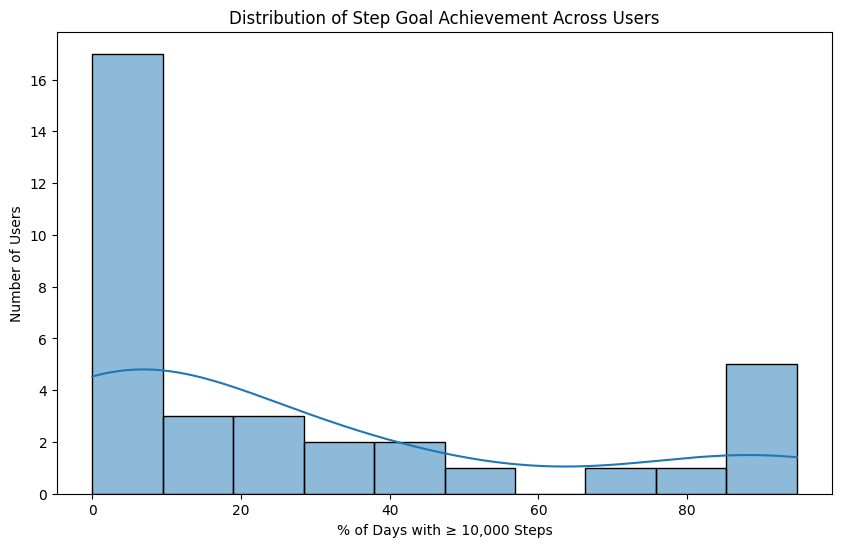

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of how many users consistently meet step goal
plt.figure(figsize=(10, 6))
sns.histplot(user_goal_summary['PercentGoalDays'], bins=10, kde=True)
plt.title('Distribution of Step Goal Achievement Across Users')
plt.xlabel('% of Days with ‚â• 10,000 Steps')
plt.ylabel('Number of Users')
plt.show()


In [11]:
# Count how many days each user logged activity
user_log_counts = daily_df.groupby('Id')['ActivityDate'].nunique().reset_index()
user_log_counts = user_log_counts.rename(columns={'ActivityDate': 'ActiveDays'})

# Sort to find most and least consistent users
most_consistent = user_log_counts.sort_values(by='ActiveDays', ascending=False).head()
least_consistent = user_log_counts.sort_values(by='ActiveDays').head()

# Display
print("üìà Top 5 Most Consistent Users:")
print(most_consistent)

print("\nüìâ Top 5 Least Consistent Users:")
print(least_consistent)


üìà Top 5 Most Consistent Users:
            Id  ActiveDays
13  4020332650          32
14  4057192912          32
0   1503960366          19
1   1624580081          19
19  4702921684          15

üìâ Top 5 Least Consistent Users:
            Id  ActiveDays
10  2891001357           8
16  4388161847           8
32  8583815059           8
24  6391747486           9
25  6775888955           9


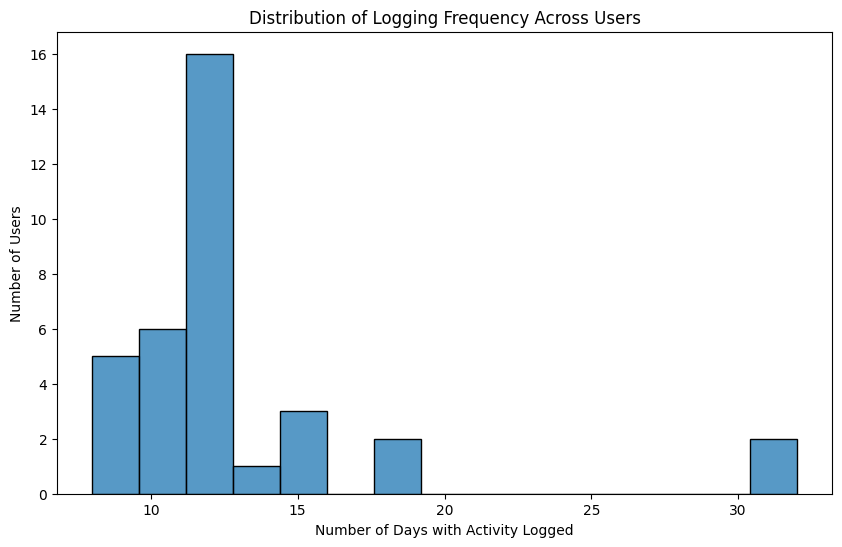

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(user_log_counts['ActiveDays'], bins=15, kde=False)
plt.title('Distribution of Logging Frequency Across Users')
plt.xlabel('Number of Days with Activity Logged')
plt.ylabel('Number of Users')
plt.show()


In [13]:
import pandas as pd

# Load the hourly steps dataset
hourly_df = pd.read_csv('cleaned_hourlySteps.csv')

# Preview structure
hourly_df.info()
hourly_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24084 entries, 0 to 24083
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24084 non-null  int64 
 1   ActivityHour  24084 non-null  object
 2   StepTotal     24084 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 564.6+ KB


Id         ActivityHour  StepTotal
0  1503960366  2016-03-12 00:00:00          0
1  1503960366  2016-03-12 01:00:00          0
2  1503960366  2016-03-12 02:00:00          0
3  1503960366  2016-03-12 03:00:00          0
4  1503960366  2016-03-12 04:00:00          0

In [14]:
# Convert ActivityHour to datetime format
hourly_df['ActivityHour'] = pd.to_datetime(hourly_df['ActivityHour'])

# Extract hour from timestamp (0‚Äì23)
hourly_df['Hour'] = hourly_df['ActivityHour'].dt.hour


In [15]:
# Group by hour and calculate average steps
avg_steps_by_hour = hourly_df.groupby('Hour')['StepTotal'].mean().reset_index()

# Round for cleaner labels
avg_steps_by_hour['StepTotal'] = avg_steps_by_hour['StepTotal'].round(2)

# Display
avg_steps_by_hour


Hour  StepTotal
0      0      44.42
1      1      20.48
2      2      10.59
3      3       7.31
4      4       9.76
5      5      26.11
6      6     120.16
7      7     267.12
8      8     365.60
9      9     430.26
10    10     437.00
11    11     452.75
12    12     520.94
13    13     457.88
14    14     474.12
15    15     390.47
16    16     447.37
17    17     453.66
18    18     505.65
19    19     528.88
20    20     399.32
21    21     261.01
22    22     172.98
23    23     102.90

C:\Users\Intel\AppData\Local\Temp\ipykernel_23604\1855568910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='StepTotal', data=avg_steps_by_hour, palette='Blues_d')


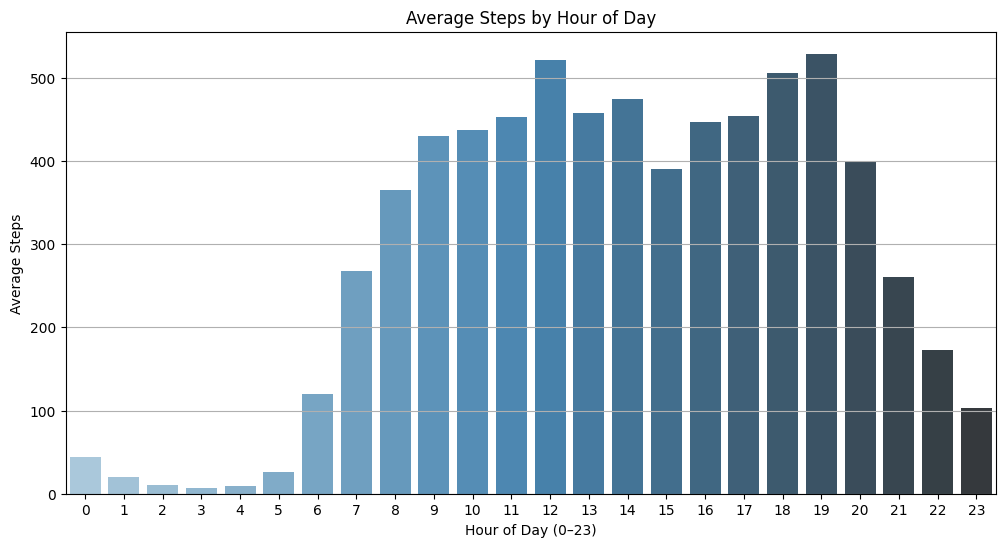

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='StepTotal', data=avg_steps_by_hour, palette='Blues_d')
plt.title('Average Steps by Hour of Day')
plt.xlabel('Hour of Day (0‚Äì23)')
plt.ylabel('Average Steps')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()



In [17]:
# Ensure datetime is in place
hourly_df['ActivityHour'] = pd.to_datetime(hourly_df['ActivityHour'])

# Extract hour and weekday
hourly_df['Hour'] = hourly_df['ActivityHour'].dt.hour
hourly_df['DayOfWeek'] = hourly_df['ActivityHour'].dt.dayofweek  # Monday=0, Sunday=6

# Label as weekday or weekend
hourly_df['DayType'] = hourly_df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [18]:
# Group by hour and day type
avg_steps_by_daytype = hourly_df.groupby(['Hour', 'DayType'])['StepTotal'].mean().reset_index()

# Round for clarity
avg_steps_by_daytype['StepTotal'] = avg_steps_by_daytype['StepTotal'].round(2)


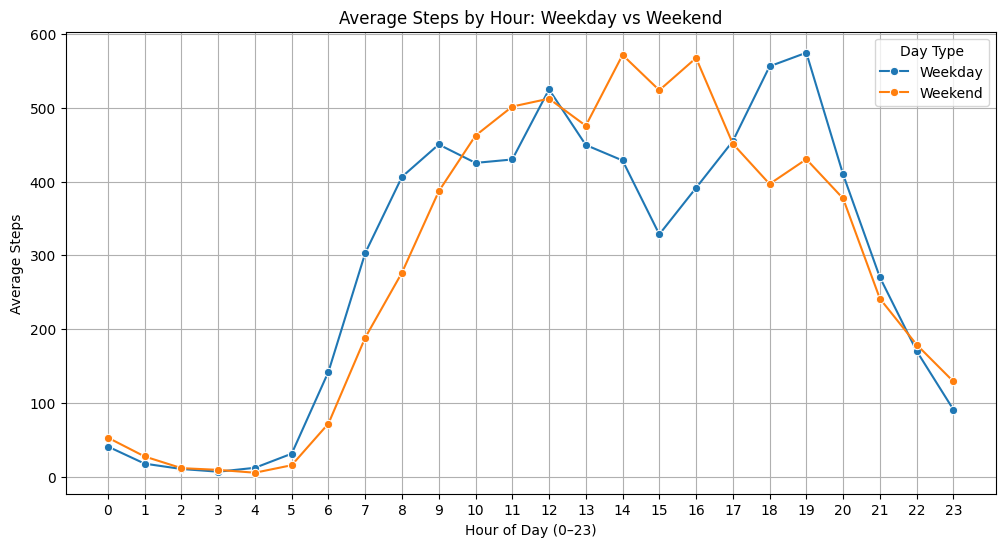

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='StepTotal', hue='DayType', data=avg_steps_by_daytype, marker='o')
plt.title('Average Steps by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day (0‚Äì23)')
plt.ylabel('Average Steps')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Day Type')
plt.show()


In [20]:
# Correlation matrix (focused only on relevant columns)
corr_matrix = merged_df[['SleepMinutes', 'TotalSteps', 'VeryActiveMinutes', 'SedentaryMinutes', 'Calories']].corr()
corr_matrix


NameError: name 'merged_df' is not defined

In [23]:
import pandas as pd

# Load the merged dataset
file_path = r'C:\Users\Intel\Downloads\Fitabase Data 3.12.16-4.11.16\Merged_Sleep_and_Activity_Data.csv'
merged_df = pd.read_csv(file_path)

# Display structure to confirm
merged_df.info()

# Correlation analysis
corr_matrix = merged_df[['SleepMinutes', 'TotalSteps', 'VeryActiveMinutes', 'SedentaryMinutes', 'Calories']].corr()
print(corr_matrix)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                199 non-null    int64  
 1   Id                        199 non-null    int64  
 2   ActivityDate              199 non-null    object 
 3   TotalSteps                199 non-null    int64  
 4   TotalDistance             199 non-null    float64
 5   TrackerDistance           199 non-null    float64
 6   LoggedActivitiesDistance  199 non-null    float64
 7   VeryActiveDistance        199 non-null    float64
 8   ModeratelyActiveDistance  199 non-null    float64
 9   LightActiveDistance       199 non-null    float64
 10  SedentaryActiveDistance   199 non-null    float64
 11  VeryActiveMinutes         199 non-null    int64  
 12  FairlyActiveMinutes       199 non-null    int64  
 13  LightlyActiveMinutes      199 non-null    int64  
 14  SedentaryM

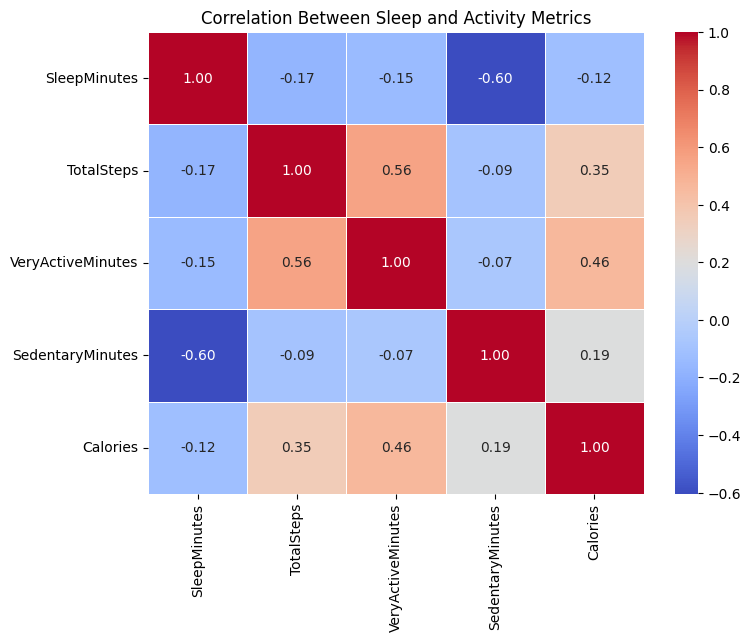

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
cols_to_plot = ['SleepMinutes', 'TotalSteps', 'VeryActiveMinutes', 'SedentaryMinutes', 'Calories']
corr_matrix = merged_df[cols_to_plot].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Sleep and Activity Metrics')
plt.show()


In [26]:
sleep_df.columns



Index(['Id', 'date', 'value', 'logId', 'day_of_week', 'day_type'], dtype='object')

C:\Users\Intel\AppData\Local\Temp\ipykernel_23604\3631174050.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sleep, x='day_type', y='value', palette='Set2')


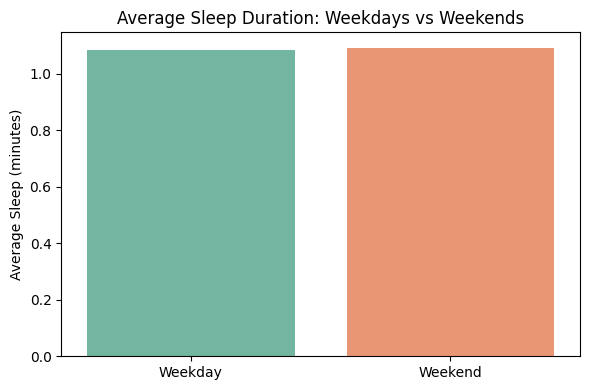

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the sleep data
sleep_df = pd.read_csv("cleaned_minuteSleep.csv")

# Step 2: Convert timestamp to datetime
sleep_df['date'] = pd.to_datetime(sleep_df['date'])

# Step 3: Extract day of the week
sleep_df['day_of_week'] = sleep_df['date'].dt.day_name()

# Step 4: Label as Weekday or Weekend
sleep_df['day_type'] = sleep_df['day_of_week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# Step 5: Group and calculate average sleep duration
avg_sleep = sleep_df.groupby('day_type')['value'].mean().reset_index()

# Step 6: Plot the result
plt.figure(figsize=(6,4))
sns.barplot(data=avg_sleep, x='day_type', y='value', palette='Set2')
plt.title("Average Sleep Duration: Weekdays vs Weekends")
plt.ylabel("Average Sleep (minutes)")
plt.xlabel("")
plt.tight_layout()
plt.show()


In [28]:
avg_sleep



day_type     value
0  Weekday  1.083235
1  Weekend  1.091106